# Проект по анализу данных (продолжение)

## Определение итоговой оценки студента

In [2]:
import numpy as np
import pandas as pd
import scipy as sp
import pylab as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import KFold, train_test_split, cross_val_score
from sklearn.metrics import r2_score
%matplotlib inline

In [3]:
def get_dataset_name(email):
    return 'student-mat.csv' if sum(ord(c) for c in email) % 2 else 'student-por.csv'

In [4]:
email = 'makorovin@edu.hse.ru'

In [5]:
get_dataset_name(email)

'student-mat.csv'

Для начала загрузите данные. Обратите внимание, чтобы данные были загружены верно (был указан верный разделитель, а так же корректно отображались названия столбцов). Чтобы это проверить, а также посмотреть, что представляют из себя данные, можно вывести первые несколько строк загруженного датасета на экран.

In [6]:
data = pd.read_csv('student-mat.csv', sep = ';')

In [7]:
data.shape==data.dropna().shape

True

In [8]:
data.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


#### Разделите признаки и целевую зависимость в две отдельные переменные X и y.

In [9]:
y = data.G3

In [10]:
X = data[data.columns[:-1]]

#### Создайте две новых матрицы с признаками: в первой будут только числовые признаки, во второй — все остальные. Для этого удобно воспользоваться методом датафрейма select_dtypes.

In [48]:
X_dig = X.select_dtypes(include = ['int64','float64'])
X_dig.head(10)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5
2,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14
4,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10
5,16,4,3,1,2,0,5,4,2,1,2,5,10,15,15
6,16,2,2,1,2,0,4,4,4,1,1,3,0,12,12
7,17,4,4,2,2,0,4,1,4,1,1,1,6,6,5
8,15,3,2,1,2,0,4,2,2,1,1,1,0,16,18
9,15,3,4,1,2,0,5,5,1,1,1,5,0,14,15


In [49]:
X_cat = X.select_dtypes(exclude = ['int64','float64'])
X_cat.head()

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no


In [50]:
check = [X_cat.shape[1]+X_dig.shape[1]==X.shape[1],X_cat.shape[0]==X_dig.shape[0]==data.shape[0]]
if check[0] and check[1]:
    print('all data processed')

all data processed


##### Наиболее коррелирующие с целевой переменной

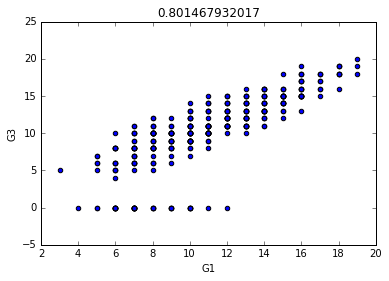

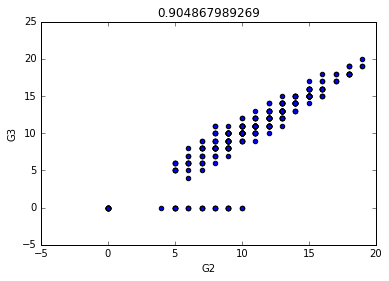

In [51]:
for col_num in range(len(X_dig.columns)):
    col_name = X_dig.columns[col_num]
    pir_coef = np.corrcoef(X_dig[col_name], y)[1][0]
    if abs(pir_coef)>=0.5:
        plt.figure()
        plt.scatter(X_dig[col_name],y)
        plt.title(pir_coef)
        plt.ylabel('G3')
        plt.xlabel(col_name)

##### Мультиколлинеарность

Убираем коррелирующие между собой признаки исходя из величины их корреляции с целевой переменной - остается признак с наивысшим коэффициентом корреляции с целевой переменной

Было признаков: 15
Стало признаков: 12


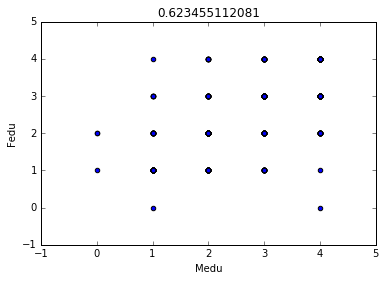

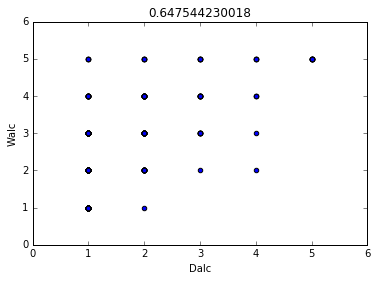

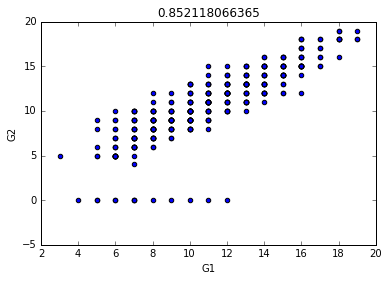

In [52]:
Multicorr = np.corrcoef(X_dig.transpose())
corr_feat = []
for feature_num1 in range(Multicorr.shape[0]):
    for feature_num2 in range(Multicorr.shape[0]):
        pirr_coef = Multicorr[feature_num1][feature_num2]
        if abs(pirr_coef)>=0.5 and feature_num1<feature_num2:# < for one half of the coefs matrix
            feature_name1 = X_dig.columns[feature_num1]
            feature_name2 = X_dig.columns[feature_num2]
            plt.figure()
            plt.scatter(X_dig[feature_name1],X_dig[feature_name2])
            plt.title(pirr_coef)
            plt.ylabel(X_dig.columns[feature_num2])
            plt.xlabel(X_dig.columns[feature_num1])
            if X_dig.corrwith(y)[feature_name1]>=X_dig.corrwith(y)[feature_name2]:
                corr_feat.append(feature_name2)
            else:
                corr_feat.append(feature_name1)
print('Было признаков:',len(X_dig.columns))
X_dig = X_dig.drop(corr_feat, axis=1)
print('Стало признаков:',len(X_dig.columns))

### Обучение моделей
- линейная регрессия LinearRegression
- регуляризованная линейная регрессия Ridge и Lasso
- случайный лес RandomForest со 100 деревьями
- метод ближайших соседей KNeighborsRegressor

Для ценки эффективности выбрана метрика r2_score

### Только числовые признаки

##### Простая линейная регрессия

In [53]:
X_dig_train, X_dig_test, y_train, y_test = train_test_split(X_dig, y, test_size = 0.3)

In [54]:
LNR = LinearRegression()
LNR.fit(X_dig_train, y_train)
print('R2 with one random train - test split is:',r2_score(LNR.predict(X_dig_test), y_test))

R2 with one random train - test split is: 0.731398348468


In [55]:
%%time
r2_mean = 0
r2_max = 0
r2_min = 1
coef_max = 0
for i in range(10000):
    X_dig_train, X_dig_test, y_train, y_test = train_test_split(X_dig, y, test_size = 0.3)
    LNR = LinearRegression()
    LNR.fit(X_dig_train, y_train)
    r2_current = r2_score(LNR.predict(X_dig_test), y_test)
    r2_mean+=r2_current/10000
    coef = max(LNR.coef_)
    if coef>coef_max:
        coef_max=coef
    if r2_current<r2_min:
        r2_min = r2_current
    elif r2_current>r2_max:
        r2_max = r2_current
print('R2 max with 10000 iters:',r2_max)
print('R2 min with 10000 iters:',r2_min)
print('R2 mean with 10000 iters:',r2_mean)
print('coef max with 10000 iters:',coef_max)

R2 max with 10000 iters: 0.918439374576
R2 min with 10000 iters: 0.301216303252
R2 mean with 10000 iters: 0.775959601588
coef max with 10000 iters: 1.15383459606
Wall time: 24 s


#### (4 балла) Подберите оптимальные значения гиперпараметров для указанных выше моделей.

##### Остальные модели
- регуляризованная линейную регрессия Ridge и Lasso
- случайный лес RandomForest со 100 деревьями
- метод ближайших соседей KNeighborsRegressor

###### Подбор гиперпараметров с помощью кросс-валидации без перетасовывания (shuffle)

In [56]:
R, L, LNR, RFR, KNR  = Ridge(), Lasso(), LinearRegression(),RandomForestRegressor(), KNeighborsRegressor()
kfold = KFold(X.shape[0],5,shuffle=False)
model_dict = {R:'alpha',L:'alpha',RFR:'max_depth', KNR:'n_neighbors'}

In [57]:
best_param_dict = {}
for model in model_dict:
    ## alpha for Lasso is to be >0 so as for RNR,KNR
    Grids = GridSearchCV(estimator=model, param_grid={model_dict[model]:[i+1 for i in range(200)]}, scoring='r2', cv = kfold)
    Grids.fit(X_dig,y)
    best_param_dict[str(model).split('(')[0]] = Grids.best_params_[model_dict[model]]
    print(str(model).split('(')[0], 'Best parameter "%s" value: %d\n' % 
          (model_dict[model],Grids.best_params_[model_dict[model]]),'R2 value is:', Grids.best_score_)

RandomForestRegressor Best parameter "max_depth" value: 132
 R2 value is: 0.869673227025
Lasso Best parameter "alpha" value: 1
 R2 value is: 0.809513098774
KNeighborsRegressor Best parameter "n_neighbors" value: 8
 R2 value is: 0.826281901749
Ridge Best parameter "alpha" value: 186
 R2 value is: 0.812559660554


In [58]:
best_param_dict

{'KNeighborsRegressor': 8,
 'Lasso': 1,
 'RandomForestRegressor': 132,
 'Ridge': 186}

###### Подбор гиперпараметров с помощью кросс-валидации с перетасовыванием

In [61]:
kfold = KFold(X.shape[0],5,shuffle=True)

In [62]:
for model in model_dict:
    Grids = GridSearchCV(estimator=model, param_grid={model_dict[model]:[i+1 for i in range(200)]}, scoring='r2', cv = kfold)
    Grids.fit(X_dig,y)
    print(str(model).split('(')[0], 'Best parameter "%s" value: %d\n' % 
          (model_dict[model],Grids.best_params_[model_dict[model]]),'R2 value is:', Grids.best_score_)

RandomForestRegressor Best parameter "max_depth" value: 24
 R2 value is: 0.892301714863
Lasso Best parameter "alpha" value: 1
 R2 value is: 0.815855435368
KNeighborsRegressor Best parameter "n_neighbors" value: 5
 R2 value is: 0.857153092269
Ridge Best parameter "alpha" value: 139
 R2 value is: 0.821661345397


#### (2 балла) Теперь измерьте качество на кросс-валидации для каждой модели с оптимальными параметрами. Для этого удобно воспользоваться функцией cross_val_score, имеющую параметры, аналогичные GridSearchCV.

In [63]:
R, L  = Ridge(alpha=best_param_dict['Ridge']), Lasso(alpha=best_param_dict['Lasso'])
RFR = RandomForestRegressor(max_depth=best_param_dict['RandomForestRegressor'])
KNR = KNeighborsRegressor(n_neighbors=best_param_dict['KNeighborsRegressor'])
kfold = KFold(X.shape[0],5,shuffle=False)
model_dict = {R:'alpha',L:'alpha',RFR:'max_depth', KNR:'n_neighbors'}

In [85]:
r2_dig_dict = {}
for model in model_dict:
    cvs = cross_val_score(model, X_dig, y, scoring='r2', cv = kfold)
    r2_dig_dict[str(model).split('(')[0]] = cvs.mean()
    print(str(model).split('(')[0])
    print('   list of r2 for different folds',cvs)
    print('   r2 mean:', cvs.mean())

Ridge
   list of r2 for different folds [ 0.86789388  0.90466178  0.81921536  0.76284838  0.70817889]
   r2 mean: 0.812559660554
KNeighborsRegressor
   list of r2 for different folds [ 0.80906321  0.90421378  0.80155013  0.83969031  0.77689209]
   r2 mean: 0.826281901749
Lasso
   list of r2 for different folds [ 0.87728768  0.89928038  0.82758388  0.74925383  0.69415972]
   r2 mean: 0.809513098774
RandomForestRegressor
   list of r2 for different folds [ 0.68727699  0.86170518  0.86420784  0.8923674   0.82056387]
   r2 mean: 0.825224258466


In [91]:
r2_dig_tuplel = sorted(r2_dig_dict.items(), key = lambda s:s[1], reverse = True)
r2_dig_tuplel

[('KNeighborsRegressor', 0.82628190174922855),
 ('RandomForestRegressor', 0.82522425846607084),
 ('Ridge', 0.81255966055357742),
 ('Lasso', 0.80951309877351496)]

В RandomForest заложен случайный выбор признаков, на основе которых происходит разбиение вершин, поэтому различна оценка r2 при многократном запуске, причем в одном случае эта оценка выше, чем у остальных моделей, в других - ниже

In [76]:
%%time
r2_mean = 0
r2_max = 0
r2_min = 1
r2_list = []
for i in range(1000):
    cvs = cross_val_score(RFR, X_dig, y, scoring='r2', cv = kfold)
    r2_current = cvs.mean()
    r2_mean += r2_current/1000
    r2_list.extend(cvs)
    if r2_current<r2_min:
        r2_min = r2_current
    elif r2_current>r2_max:
        r2_max = r2_current
r2_dig_dict['RandomForestRegressor'] = r2_mean
print('R2 max with 10000 iters:',r2_max)
print('R2 min with 10000 iters:',r2_min)
print('R2 mean with 10000 iters:',r2_mean)

R2 max with 10000 iters: 0.869308256924
R2 min with 10000 iters: 0.77872277447
R2 mean with 10000 iters: 0.826714739646
Wall time: 1min 11s


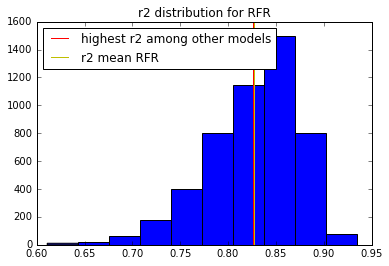

In [92]:
plt.hist(r2_list)
plt.vlines(max([i[1] for i in r2_dig_tuplel if not 'RandomForestRegressor' in i]),0,1600, colors='r')
plt.vlines(r2_mean,0,1600, colors='y')
plt.title('r2 distribution for RFR')
plt.legend(['highest r2 among other models','r2 mean RFR'], loc = 2)

В среднем, Случайный лес оказывается незначительно более эффективным

In [93]:
from scipy.stats import ttest_1samp

In [105]:
ttest = ttest_1samp(r2_list, max([i[1] for i in r2_dig_tuplel if not 'RandomForestRegressor' in i]))
ttest

Ttest_1sampResult(statistic=0.6428740048757039, pvalue=0.5203353427106554)

In [107]:
if ttest[1]>=0.05:
    print('Модели RFR и Kmean в среднем работают одинаково')
else:
    print('Модель RFR в среднем работает лучше')

Модели RFR и Kmean в среднем работают одинаково


#### (1 балл) Вернемся к отложенной матрице категориальных признаков. Так как алгоритмы не умеют работать со строковыми данными, преобразуйте их с помощью функции get_dummies в числовую матрицу, где значение каждого признака будет закодировано как бинарное. Сколько признаков теперь получилось?

In [108]:
X_cat_dig = pd.get_dummies(X_cat)
X_cat_dig.head()

,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
1,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
3,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
4,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0


In [109]:
print('Было признаков:', data.columns.shape[0])
XX = pd.concat([X_dig, X_cat_dig], axis = 1)
print('Стало признаков:',len(XX.columns))

Было признаков: 33
Стало признаков: 55


#### (1 балл) Обучите модели с оптимальными параметрами из предыдущего пункта и измерьте качество на полной матрице признаков с помощью функции cross_val_score.

In [110]:
%%time
r2_mean = 0
r2_max = 0
r2_min = 1
coef_max = 0
for i in range(10000):
    XX_train, XX_test, y_train, y_test = train_test_split(X_dig, y, test_size = 0.3)
    LNR = LinearRegression()
    LNR.fit(XX_train, y_train)
    r2_current = r2_score(LNR.predict(XX_test), y_test)
    r2_mean+=r2_current/10000
    coef = max(LNR.coef_)
    if coef>coef_max:
        coef_max=coef
    if r2_current<r2_min:
        r2_min = r2_current
    elif r2_current>r2_max:
        r2_max = r2_current
print('R2 max with 10000 iters:',r2_max)
print('R2 min with 10000 iters:',r2_min)
print('R2 mean with 10000 iters:',r2_mean)
print('coef max with 10000 iters:',coef_max)

R2 max with 10000 iters: 0.925519970183
R2 min with 10000 iters: 0.305581390967
R2 mean with 10000 iters: 0.77638335404
coef max with 10000 iters: 1.16490087067
Wall time: 28.5 s


In [111]:
r2_XX_dict = {}
for model in model_dict:
    cvs = cross_val_score(model, XX, y, scoring='r2', cv = kfold)
    r2_XX_dict[str(model).split('(')[0]] = cvs.mean()
    print(str(model).split('(')[0])
    print('   list of r2 for different folds',cvs)
    print('   r2 mean:', cvs.mean())

Ridge
   list of r2 for different folds [ 0.86555699  0.89864137  0.81607818  0.76543382  0.70749662]
   r2 mean: 0.810641394262
KNeighborsRegressor
   list of r2 for different folds [ 0.80373314  0.87699417  0.81259406  0.83976733  0.74011315]
   r2 mean: 0.814640369941
Lasso
   list of r2 for different folds [ 0.87728768  0.89928038  0.82758388  0.74925383  0.69415972]
   r2 mean: 0.809513098774
RandomForestRegressor
   list of r2 for different folds [ 0.74204396  0.76570813  0.81577089  0.84793283  0.73251581]
   r2 mean: 0.7807943246


In [112]:
r2_XX_dict

{'KNeighborsRegressor': 0.8146403699405651,
 'Lasso': 0.80951309877351496,
 'RandomForestRegressor': 0.78079432459950171,
 'Ridge': 0.81064139426165949}

In [113]:
%%time
r2_mean = 0
r2_max = 0
r2_min = 1
r2_list = []
for i in range(1000):
    cvs = cross_val_score(RFR, X_dig, y, scoring='r2', cv = kfold)
    r2_current = cvs.mean()
    r2_mean += r2_current/1000
    r2_list.extend(cvs)
    if r2_current<r2_min:
        r2_min = r2_current
    elif r2_current>r2_max:
        r2_max = r2_current
r2_XX_dict['RandomForestRegressor'] = r2_mean
print('R2 max with 10000 iters:',r2_max)
print('R2 min with 10000 iters:',r2_min)
print('R2 mean with 10000 iters:',r2_mean)

R2 max with 10000 iters: 0.867668533997
R2 min with 10000 iters: 0.783704708005
R2 mean with 10000 iters: 0.826354913544
Wall time: 1min 12s


In [114]:
r2_XX_tuplel = sorted(r2_XX_dict.items(), key = lambda s:s[1], reverse = True)
r2_XX_tuplel

[('RandomForestRegressor', 0.82635491354396917),
 ('KNeighborsRegressor', 0.8146403699405651),
 ('Ridge', 0.81064139426165949),
 ('Lasso', 0.80951309877351496)]

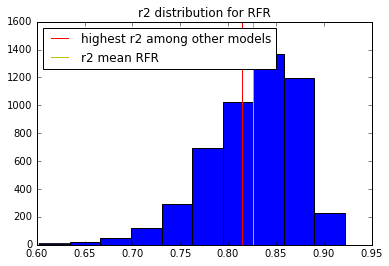

In [117]:
plt.hist(r2_list)
plt.vlines(max([i[1] for i in r2_XX_tuplel if not 'RandomForestRegressor' in i]),0,1600, colors='r')
plt.vlines(r2_mean,0,1600, colors='y')
plt.title('r2 distribution for RFR')
plt.legend(['highest r2 among other models','r2 mean RFR'], loc = 2)

#### (2 балла) Ответьте на следующие вопросы:
- какая из моделей имеет наилучшее качество в первом случае, а какая — во втором?
- есть ли модели, для которых добавление категориальных признаков дало прирост в качестве?
- какая из использованных моделей кажется вам наиболее сложной и почему?

In [118]:
r2_differ_dict = {}
for key in r2_XX_dict:
    r2_differ_dict[key] = r2_dig_dict[key] - r2_XX_dict[key]
sorted(r2_differ_dict.items(), key = lambda s:s[1], reverse = True)

[('KNeighborsRegressor', 0.011641531808663452),
 ('Ridge', 0.0019182662919179361),
 ('Lasso', 0.0),
 ('RandomForestRegressor', -0.0011306550778983349)]

 - В обоих случаях наивысшее качество имеет модель случайных лесов
 - Да, пренебрежимо малый прирост получила модель случайных лесов: 11е-4
 - Модель случайных лесов, т.к. она требует дополнительных оценок эффективности - распределения метрики качества, при кросс валидации без перемешивания дает случайный ответ из некоторого распределения, которое необходимо оценить

#### (1 дополнительный балл) Обучите случайный лес на полной матрице признаков и найдите топ3 наиболее важных признаков. Можно ли дать интерпретацию почему эти признаки оказались наиболее информативными в рамках данной задачи?

In [119]:
XX_train, XX_test, y_train, y_test = train_test_split(XX, y, test_size = 0.3)
RFR.fit(XX_train,y_train)
XX_importance_dict = {}
for feature_num in range(len(XX.columns)):
    XX_importance_dict[XX.columns[feature_num]] = RFR.feature_importances_[feature_num]
print('TOP 3 important features')
sorted(XX_importance_dict.items(), key = lambda s:s[1], reverse = True)[:3]

TOP 3 important features


[('G2', 0.79487947681503879),
 ('absences', 0.10750674300051311),
 ('Walc', 0.013120541488814886)]

In [120]:
print('TOP 3 least important features')
sorted(XX_importance_dict.items(), key = lambda s:s[1], reverse = True)[-3:]

TOP 3 least important features


[('Fjob_at_home', 2.4312039744900676e-05),
 ('Fjob_health', 1.6179560291138262e-05),
 ('higher_yes', 0.0)]

In [136]:
alco = data[['Walc', 'G3']]
print('Средняя оценка самых пьяных студентов',alco.ix[XX.Walc == max(XX.Walc)].G3.mean())
print('Средняя редко трезвых студентов',alco.ix[XX.Walc == 4].G3.mean())
print('Средняя умеренно пьющих студентов',alco.ix[XX.Walc == 3].G3.mean())
print('Средняя оценка иногда выпивающих студентов',alco.ix[XX.Walc == 2].G3.mean())
print('Средняя оценка непьющих студентов',alco.ix[XX.Walc == 1].G3.mean())

Средняя оценка самых пьяных студентов 10.142857142857142
Средняя редко трезвых студентов 9.686274509803921
Средняя умеренно пьющих студентов 10.725
Средняя оценка иногда выпивающих студентов 10.08235294117647
Средняя оценка непьющих студентов 10.735099337748345


In [140]:
for top_feat in [tupl[0] for tupl in sorted(XX_importance_dict.items(), key = lambda s:s[1], reverse = True)[:3]]:
    print('Коэффициент корреляции %s и целевой переменной' % (top_feat),XX.corrwith(y)[top_feat])

Коэффициент корреляции G2 и целевой переменной 0.904867989269
Коэффициент корреляции absences и целевой переменной 0.0342473161501
Коэффициент корреляции Walc и целевой переменной -0.0519393237422


 - G2 отражает наиболее актуальную информацию об успеваемости и подготовке студентов, поэтому она наиболее весома для определения итоговой оценки 
 - Пропуски(absences) часто влияют на подготовку студентов, чем больше пропусков, тем скорее ниже оценка
 - Студенты в очень малой части подвержены влиянию уровня употребления алкоголя в неделю, коэффициент корреляции соответствует обратной зависимости между итоговой оценкой и употреблением алкоголя. Чем больше студенты пьют, тем немного хуже они учатся, хотя регулярно пьющим студентам (Walc = 5/5) алкоголь не мешает в среднем учиться лучше студентов, выпивающих лишь изредка (Walc = 2/5), и студентов, выпивающих очень часто(Walc = 4/5). 

In [121]:
sorted(XX_importance_dict.items(), key = lambda s:s[1], reverse = True)

[('G2', 0.79487947681503879),
 ('absences', 0.10750674300051311),
 ('Walc', 0.013120541488814886),
 ('famrel', 0.010930867887551213),
 ('health', 0.0084831047521606827),
 ('famsize_GT3', 0.0068586459075436011),
 ('schoolsup_no', 0.0068325437875296881),
 ('goout', 0.005859422674777898),
 ('freetime', 0.0050328593840084628),
 ('age', 0.0041615069125016859),
 ('Medu', 0.0041286924748063893),
 ('Mjob_health', 0.0041078996529057051),
 ('failures', 0.0035577811157284423),
 ('guardian_mother', 0.0027644912772514163),
 ('traveltime', 0.0017229305605211179),
 ('schoolsup_yes', 0.0016524476436896556),
 ('guardian_father', 0.0014872804391288248),
 ('romantic_yes', 0.0014757437532130304),
 ('internet_yes', 0.0013055426663470785),
 ('reason_reputation', 0.0012289984829092202),
 ('address_R', 0.00091402325744422623),
 ('famsup_yes', 0.00083137316941760847),
 ('paid_no', 0.00082601756604298133),
 ('studytime', 0.00078080156989822022),
 ('Fjob_other', 0.00073898842895873148),
 ('Fjob_services', 0.0007